# Geoplot tutorial

## Introduction

``geoplot`` is a tool which fills a gap which I have perceived, in my own work, as a serious shortcoming in the
geospatial Python ecosystem: the need for a high-level geospatial plotting library.

Geospatial data is any form of data which has a location to it. Most of the data generated today has such a
geospatial context, context which is, in turn, oftentimes important to understanding the data itself. Thanks to its
ease-of-use and deep ecosystem, the Python programming language has emerged as a leading choice in the performance of
data analytics, geospatial data analytics included.

Though there are increasingly many options, the venerable ``matplotlib`` remains the core Python plotting tool.
Nevertheless, we oftentimes don't interact with ``matplotlib`` directly; we instead use extensions built over it,
like the ``pandas`` plotting facilities or ``seaborn``, to get our work done. Knowing how ``matplotlib`` operates is
certainly helpful, but it's neither necessary to get started nor, usually, the fastest way to get something done.

``geoplot`` aims to be ``seaborn`` for geospatial data. Hence it comes with the following built-in features:

* **High-level plotting API**: ``geoplot`` is cartographic plotting for the 90% of use cases. All of the
  standard-bearer maps that you've probably seen in your geography textbook are easily accessible, as are many more
  novel options.
* **Native projection support**: The most fundamental peculiarity of geospatial plotting is projection: how do you
  unroll a sphere onto a flat surface (a map) in an accurate way? The answer depends on what you're trying to depict.
  ``geoplot`` provides these options.
* **Compatibility with matplotlib**: While ``matplotlib`` is not a good fit for working with geospatial data
  directly, it's a format that's well-incorporated by other geospatial tools (``mplleaflet`` in particular). For
  compatibility, ``geoplot`` provides an option for emiting pure ``matplotlib`` plots.
* **Built with modern geospatial Python in mind**: Geospatial data is a fast-moving target in the Python ecosystem.
  Innovations in recent years have made working with such data much easier than it was when e.g. matplotlib's
  lower-level ``basemap`` tool was being developed, which ``geoplot`` leverages with an easy-to-use and widely
  compatible API.

``geoplot`` does this by leveraging two pre-existing libraries in particular: ``geopandas``, an extension to
the mainstay ``pandas`` library with embedded geospatial data support, used for input; and ``cartopy``, a
(``matplotlib``-based) low-level plotting library, used for output.

The rest of this text is a tutorial on ``geoplot`` usage. It is written for the perspective of someone who has some
existing familiarity with the existing data science ecosystem, but hasn't used the geospatial tools just yet. If you
haven't worked with data before in Python and are thus unfamiliar with ``pandas``, you should refer to its
documentation first - [10 Minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) is one place
where you can get started.

## Working with geospatial data

In order to understand how to use ``geoplot``, we need to understand a bit about the format it expects to recieves its data in: a ``geopandas`` ``GeoDataFrame``.

The ``GeoDataFrame`` is an augmented version of a ``pandas`` ``DataFrame`` with an attached geometry:

In [1]:
import geopandas as gpd
boroughs = gpd.read_file("../data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')
boroughs

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623853e+09,330385.03697,(POLYGON ((-74.05050806403247 40.5664220341608...
1,4,Queens,3.049947e+09,861038.47930,(POLYGON ((-73.83668274106708 40.5949466970158...
2,3,Brooklyn,1.959432e+09,726568.94634,(POLYGON ((-73.8670614947212 40.58208797679338...
3,1,Manhattan,6.364422e+08,358532.95642,(POLYGON ((-74.01092841268033 40.6844914725429...
4,2,Bronx,1.186804e+09,464517.89055,(POLYGON ((-73.89680883223775 40.7958084451597...


Any operation that will work on a ``DataFrame`` will work on a ``GeoDataFrame``, but the latter adds a few additional
methods and features for dealing with geometry not present in the former. The most obvious of these is the addition
of a column for storing geometries, accessible using the ``geometry`` attribute:

In [2]:
boroughs.geometry

0    (POLYGON ((-74.05050806403247 40.5664220341608...
1    (POLYGON ((-73.83668274106708 40.5949466970158...
2    (POLYGON ((-73.8670614947212 40.58208797679338...
3    (POLYGON ((-74.01092841268033 40.6844914725429...
4    (POLYGON ((-73.89680883223775 40.7958084451597...
Name: geometry, dtype: object

That geometry is stored with reference to some kind of [**coordinate reference system**](https://en.wikipedia.org/wiki/Spatial_reference_system), or CRS. You can extract what CRS your polygons are stored in using the `crs` attribute:

In [3]:
boroughs.crs

{'init': 'epsg:4326'}

In this case `epsg:4326` is an identifier for what the rest of us more commonly refer to as "longitude and latitude". EPSG itself is a standardized system for refering to coordinate reference systems; [spatialreference.org](http://spatialreference.org/ref/epsg/wgs-84/) is the best place to look these identifiers up.

Coordinate reference systems are, basically, different ways of mathematically calculating locations. Due to the complexity of the surface of the earth, different geographically sensitive systems of measurement are more or less useful for different tasks. For example, the United States Geolocial Service, which provides extremely high-accuracy maps of United States localities, maintains individual coordinate reference systems, refered to as "state plane systems", for the various states of the union. These are used throughout government, and look nothing like the latitude and longitude coordinates that we are generally more used to.

For example, New York City approximately twice per year releases an updated version of MapPLUTO, a geospatial dataset which provides building footprint polygons for all buildings in New York City. This is the dataset which powers some pretty amazing visualizations, like [Bklynr's Brooklyn building age map](http://bklynr.com/block-by-block-brooklyns-past-and-present/).

In [4]:
manhattan_buildings = gpd.read_file('../data/manhattan_mappluto/MN_Dcp_Mappinglot.shp')
manhattan_buildings.head()

,BLOCK,BORO,CREATED_BY,CREATED_DA,LAST_MODIF,LAST_MOD_1,LOT,Shape_Area,Shape_Leng,geometry
0,20009,1,None,1999-11-30,sj,2006-11-30,9999,10289.237892,836.495687,"POLYGON ((986519.6798000038 200244.1201999933,..."
1,20031,1,None,1999-11-30,sj,2006-11-30,9999,8943.539985,478.609196,"POLYGON ((992017.6599999964 216103.8700000048,..."
2,20027,1,None,1999-11-30,sj,2006-11-30,9999,10156.610383,486.181920,"POLYGON ((991564.0900000036 215278.3798999935,..."
3,20012,1,None,1999-11-30,sj,2006-11-30,9999,7657.969093,357.345276,"POLYGON ((986364.6000999957 201496.4998999983,..."
4,20067,1,None,1999-11-30,sj,2007-11-30,9999,9171.078777,479.281556,"POLYGON ((995870.7099999934 223069.0699999928,..."


But, unlike our easy coordinates above, this data is stored in the Long Island State Plane coordinate reference system:

In [5]:
manhattan_buildings.geometry.head()

0    POLYGON ((986519.6798000038 200244.1201999933,...
1    POLYGON ((992017.6599999964 216103.8700000048,...
2    POLYGON ((991564.0900000036 215278.3798999935,...
3    POLYGON ((986364.6000999957 201496.4998999983,...
4    POLYGON ((995870.7099999934 223069.0699999928,...
Name: geometry, dtype: object

The file we just read in provided embedded information about its coordinate reference system, which `geopandas` stores as a [`proj4`](https://github.com/OSGeo/proj.4) string:

In [6]:
manhattan_buildings.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

``geoplot`` expects its input to be in terms of latitude and longitude. This is required because it's so easy to do: to convert your data from one CRS to another, you can just use the `geopandas` `to_crs` method:

In [7]:
manhattan_buildings = manhattan_buildings.to_crs(epsg=4326)

Now all of our building footprints are in ordinary coordinates! 

In [8]:
manhattan_buildings.geometry.head()

0    POLYGON ((-73.99181250685882 40.71630025841903...
1    POLYGON ((-73.97196114404649 40.75982822136702...
2    POLYGON ((-73.97359928976277 40.75756284914222...
3    POLYGON ((-73.99237153770106 40.71973777834428...
4    POLYGON ((-73.95804078098135 40.77894165663843...
Name: geometry, dtype: object

You should also know, at a minimum, that all of these geometries are always  [`shapely`](http://toblerity.org/shapely/manual.html) objects:

In [9]:
type(manhattan_buildings.geometry.iloc[0])

shapely.geometry.polygon.Polygon

In [10]:
type(boroughs.geometry.iloc[0])

shapely.geometry.multipolygon.MultiPolygon

`shapely` provides a large API surface for any geometric transformation or operations that you can think of, and `geopandas` wraps many of these even further, creating a convenient way of getting "classical" GIS operations done on your data. Like `geopandas`, `shapely` is very well-documented, so to dive into these further [read the documentation](http://toblerity.org/shapely/manual.html).

In this tutorial, we'll focus on one particular aspect of `shapely` which is likely to come up: defining your own geometries. A decision I made early on in the design stages of `geoplot` was mandating input as a `GeoDataFrame`, as doing so (as opposed to, say, also supporting `DataFrame` input) greatly simplifies both internal and external library design.

However, in the cases above we read a GeoDataFrame straight out of geospatial files: our borough information was stored in the [GeoJSON](http://geojson.org/) format, while our building footprints were a [Shapefile](https://en.wikipedia.org/wiki/Shapefile). What if we have geospatial data embedded in an ordinary `CSV` or `JSON` file, which read into an ordinary `pandas` `DataFrame`?

In [11]:
import pandas as pd
collisions = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions.csv", index_col=0).sample(5000)
collisions = collisions[collisions['LOCATION'].notnull()]
collisions.head()

,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
DATE,,,,,,,,,,,,,,,,,,,,,
09/07/2014,14:20,MANHATTAN,10016.0,40.746035,-73.976791,"(40.7460346, -73.9767909)",EAST 35 STREET,TUNNEL EXIT STREET,NaN,0,...,Failure to Keep Right,NaN,NaN,NaN,1019969,PASSENGER VEHICLE,AMBULANCE,NaN,NaN,NaN
12/25/2012,14:56,NaN,NaN,40.846467,-73.945154,"(40.8464674, -73.9451536)",NaN,NaN,NaN,0,...,Unspecified,NaN,NaN,NaN,2873041,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
04/22/2013,18:45,STATEN ISLAND,10305.0,40.594152,-74.086580,"(40.5941523, -74.0865797)",HYLAN BOULEVARD,REID AVENUE,NaN,0,...,Unspecified,NaN,NaN,NaN,297613,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
03/27/2015,9:30,QUEENS,11412.0,40.699169,-73.760797,"(40.6991686, -73.7607975)",194 STREET,113 ROAD,NaN,1,...,Unspecified,NaN,NaN,NaN,3193324,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
02/02/2015,8:00,BRONX,10475.0,40.886130,-73.827585,"(40.8861303, -73.8275845)",BOSTON ROAD,NOELL AVENUE,NaN,0,...,Unspecified,NaN,NaN,NaN,3162339,UNKNOWN,UNKNOWN,NaN,NaN,NaN


In [12]:
collisions[['LATITUDE', 'LONGITUDE']].head()

,LATITUDE,LONGITUDE
DATE,,
09/07/2014,40.746035,-73.976791
12/25/2012,40.846467,-73.945154
04/22/2013,40.594152,-74.086580
03/27/2015,40.699169,-73.760797
02/02/2015,40.886130,-73.827585


In that case we can import `shapely` directly, use it to define our own geometries, using the data from our `DataFrame`, and use that to initialize a `GeoDataFrame`.

In [13]:
import shapely

collision_points = collisions.apply(lambda srs: shapely.geometry.Point(srs['LONGITUDE'], srs['LATITUDE']),
                                    axis='columns')
collision_points.head()

DATE
09/07/2014    POINT (-73.97679090000001 40.7460346)
12/25/2012           POINT (-73.9451536 40.8464674)
04/22/2013           POINT (-74.0865797 40.5941523)
03/27/2015           POINT (-73.7607975 40.6991686)
02/02/2015           POINT (-73.8275845 40.8861303)
dtype: object

From there we pass this iterable of geometries to the `geometry` property of the `GeoDataFrame` initializer, and we're done!

In [14]:
collisions_geocoded = gpd.GeoDataFrame(collisions, geometry=collision_points)
collisions_geocoded.head(5)

,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
DATE,,,,,,,,,,,,,,,,,,,,,
09/07/2014,14:20,MANHATTAN,10016.0,40.746035,-73.976791,"(40.7460346, -73.9767909)",EAST 35 STREET,TUNNEL EXIT STREET,NaN,0,...,NaN,NaN,NaN,1019969,PASSENGER VEHICLE,AMBULANCE,NaN,NaN,NaN,POINT (-73.97679090000001 40.7460346)
12/25/2012,14:56,NaN,NaN,40.846467,-73.945154,"(40.8464674, -73.9451536)",NaN,NaN,NaN,0,...,NaN,NaN,NaN,2873041,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,POINT (-73.9451536 40.8464674)
04/22/2013,18:45,STATEN ISLAND,10305.0,40.594152,-74.086580,"(40.5941523, -74.0865797)",HYLAN BOULEVARD,REID AVENUE,NaN,0,...,NaN,NaN,NaN,297613,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,POINT (-74.0865797 40.5941523)
03/27/2015,9:30,QUEENS,11412.0,40.699169,-73.760797,"(40.6991686, -73.7607975)",194 STREET,113 ROAD,NaN,1,...,NaN,NaN,NaN,3193324,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,POINT (-73.7607975 40.6991686)
02/02/2015,8:00,BRONX,10475.0,40.886130,-73.827585,"(40.8861303, -73.8275845)",BOSTON ROAD,NOELL AVENUE,NaN,0,...,NaN,NaN,NaN,3162339,UNKNOWN,UNKNOWN,NaN,NaN,NaN,POINT (-73.8275845 40.8861303)


In [15]:
type(collisions_geocoded)

geopandas.geodataframe.GeoDataFrame

In most cases, data with geospatial information provided in a CSV will be point data corresponding with individual coordinates. Sometimes, however, one may wish to define more complex geometry: square areas, for example, and *maybe* even complex polygons. While we won't cover these cases, they're quite similar to the extremely simple point case we've shown here. For further reference on such a task, refer to the `shapely` documentation.

## Projections

Now that we know how to get our data into the form that we need it, we can move on to examining the library itself.

The simplest starting point is `polyplot`. This rudimentary plot type which simply takes the geometry in the data and plops it down on a map: nothing more.

In [16]:
import sys; sys.path.insert(0, '../')  # ignore this
import geoplot as gplt
%matplotlib inline

In [37]:
usa = gpd.read_file("../data/united_states/usa.geojson")
usa = usa[~usa['adm1_code'].isin(['USA-3517', 'USA-3563'])]

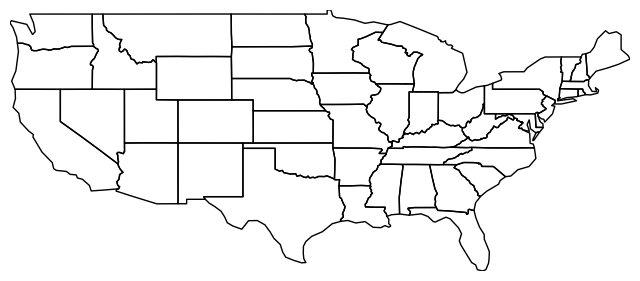

In [38]:
gplt.polyplot(usa)

A plot of this kind is called an **unprojected plot**. It faithfully reproduces exact latitude and longitudes as Cartesian coordinates on a plane.

But remember, the Earth is not a flat surface; it's a sphere. This isn't a map of the United States that you'd seen in print anywhere because it badly distorts both of the [two criteria](http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Map%20coordinate%20systems/How%20to%20choose%20a%20projection.htm) most projections are evaluated on: *shape* and *area*.

Nevertheless, unprojected plots have their uses. Firstly, for small features, unprojected plots are usually OK. Second of all, there is the fact that when not provided a projection ``geoplot`` tries to output a pure ``matplotlib`` figure, which means that this tool can be easily incorporated with other ``matplotlib`` figures or with other tools, like ``mplleaflet``, which expect ``matplotlib`` input.

But if we're not trying to achieve either of these things, it's better to pick a good projection and use that instead.

In the case of the contiguous United States, the coordinate reference system most often used is known as the Albers Equal Area projection. To place our plot in a projection, we need to pass the projection of interest to the `projection` keyword parameter. ``geoplot`` functions expect input to come from the `geoplot.crs` module, imported as ``ccrs`` by convention.

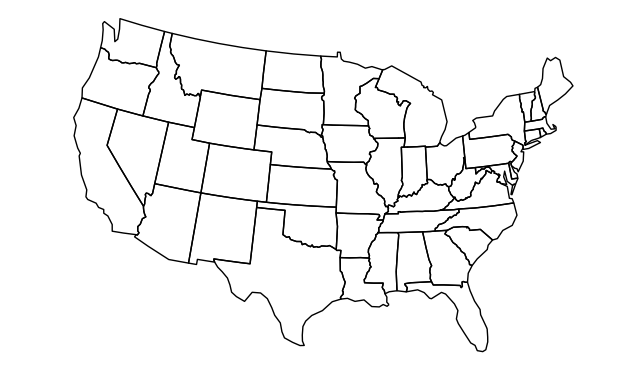

In [39]:
import geoplot.crs as ccrs
gplt.polyplot(usa, projection=ccrs.AlbersEqualArea())

``geoplot`` projections are a very thin wrapper on ``cartopy.crs`` projections, and every ``cartopy`` projection is implemented in ``geoplot.crs``. As such, for a list of implemented projections [refer to the Cartopy documentation](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html).

You may be wondering, if ``geoplot.crs`` is a wrapper on ``cartopy.crs``, why not just use Cartopy CRS objects directly? This comes down to an important implementation detail: when Cartopy CRS objects are used as the library  intends for them to be used, projection geolocation settings are supposed to be defined as parameters to the projection and cannot be modified after instantiation. This means that if you don't explicitly specify otherwise yourself, a Cartopy CRS object will result in a map centered on mid-Africa&mdash;coordinate `(0, 0)`!

``geoplot`` avoids forcing this extra work on the user by computing sensible defaults, based on the data provided, when exact settings are not provided. This is why the plot above "just works": ``geoplot`` computed the mean centroid of the polygons and centered the plot on that coordinate in the background. This feature comes at the cost of a little bit of awkwardness, requiring our wrapper classes, but overall the tradeoff seems to be very "worth it".

The defaults aren't perfect, however. If you look closely at this figure you'll notice that our copy of the United States is ever so slightly skewed downwards and to the right, indicating that our settings are a teeny bit wrong. We can correct this by specifying the centering coordinates ourselves.

The [center of the contiguous United States](https://en.wikipedia.org/wiki/Geographic_center_of_the_contiguous_United_States) is 39°50′N 98°35′W. If we provide approximately these coordinates as `central_latitude` and `central_longitude` coordinates to our projection, our skew is fixed!

[Note: a future version of this library might fix this issue with more accurate approximations.]

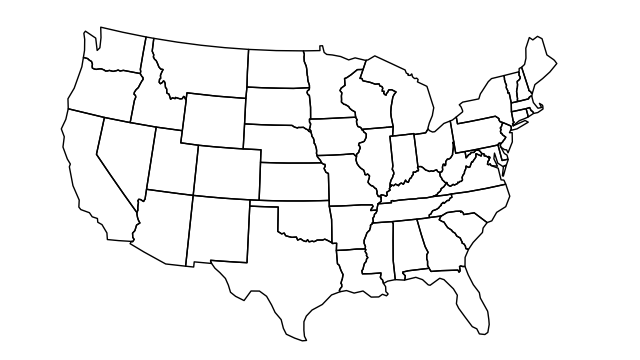

In [40]:
gplt.polyplot(usa, projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5))

This is the version of the map of the United States that you're probably most familiar with.

TODO: Geostationary demo (but why doesn't it work? Sigh...)